## Business Problem
Perusahaan telekomunikasi mengalami customer churn yang signifikan.
Tujuan analisis ini adalah mengidentifikasi faktor utama yang memengaruhi churn dan memberikan rekomendasi strategis untuk meningkatkan retensi pelanggan.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

#Customer Churn Analysis & Retention Strategy Recommendation

In [ ]:
# preview data
df_telco.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
# info tipe data
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
# mengubah tipe data pada 'Total Charges'
df_telco['Total Charges']= pd.to_numeric(df_telco['Total Charges'],errors='coerce')

In [ ]:
# cek data type 'Total Charges'
df_telco['Total Charges'].dtype

dtype('float64')

In [ ]:
# statistik deskriptif untuk kolom numerik
print ("Statisik Deskriptif (Numerik):")
df_telco.describe().round(2)

Statisik Deskriptif (Numerik):


,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.00,7043.00,7043.00,7043.00,7043.00,7032.00,7043.00,7043.00,7043.00
mean,1.0,93521.96,36.28,-119.80,32.37,64.76,2283.30,0.27,58.70,4400.30
std,0.0,1865.79,2.46,2.16,24.56,30.09,2266.77,0.44,21.53,1183.06
min,1.0,90001.00,32.56,-124.30,0.00,18.25,18.80,0.00,5.00,2003.00
25%,1.0,92102.00,34.03,-121.82,9.00,35.50,401.45,0.00,40.00,3469.00
50%,1.0,93552.00,36.39,-119.73,29.00,70.35,1397.48,0.00,61.00,4527.00
75%,1.0,95351.00,38.22,-118.04,55.00,89.85,3794.74,1.00,75.00,5380.50
max,1.0,96161.00,41.96,-114.19,72.00,118.75,8684.80,1.00,100.00,6500.00


**💡Insight Statistik Deskriptif (Numerik)**
```
*   Rata-rata customer berlangganan selama 32 bulan dengan monthly charges $64.76
*   Tingkat churn value mencapai 27%, menunjukkan bahwa sekitar seperempat customer berhenti berlangganan
*   Nilai rata-rata CLTV sebesar $4.400 menunjukkan potensi nilai ekonomi yang signifikan setiap customer

In [ ]:
# statistik deskriptif untuk kolom kategorikal
print ("Statistik Deskriptif (Kategorikal):")
df_telco.describe(include='object')

Statistik Deskriptif (Kategorikal):


,CustomerID,Country,State,City,Lat Long,Gender,Senior Citizen,Partner,Dependents,Phone Service,...,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Churn Label,Churn Reason
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043,7043,1869
unique,7043,1,1,1129,1652,2,2,2,2,2,...,3,3,3,3,3,3,2,4,2,20
top,3186-AJIEK,United States,California,Los Angeles,"34.159534, -116.425984",Male,No,No,No,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,Attitude of support person
freq,1,7043,7043,305,5,3555,5901,3641,5416,6361,...,3088,3095,3473,2810,2785,3875,4171,2365,5174,192


** 💡Insight Statistik Deskriptif (Kategorikal)**
```
*   Mayoritas pelanggan menggunakan kontrak bulanan (Month to month) sebanyak 3875 pelanggan
*   Sebagian besar pelanggan tidak termasuk kategori senior citizen dan tidak memiliki tanggungan (berdasarkan dependents)
*   Metode pembayaran yang paling umum digunakan adalah electronic check

In [ ]:
len(df_telco.drop_duplicates())

7043

In [ ]:
# cek missing value
print ("Missing value")
df_telco.isna().sum()

Missing value


,0
CustomerID,0
Count,0
Country,0
State,0
City,0
Zip Code,0
Lat Long,0
Latitude,0
Longitude,0
Gender,0


In [ ]:
# drop missing values dari Total Charges
df_telco = df_telco.dropna(subset=['Total Charges'])

In [ ]:
# cek jumlah churn value sesuai jenisnya karena terlihat dibagian churn reason
# kolom churn reason hanya diisi untuk customer yang churn value = 1, maka churn reason terdeteksi ada 5174 missing values (churn value = 0) dan itu bukan masalah, dengan kesimpulan tidak ada missing values
df_telco['Churn Value'].value_counts()

,count
Churn Value,
0,5163
1,1869


In [ ]:
# cek missing value setelah drop kolom
print ("Missing value")
df_telco.isna().sum()

Missing value


,0
CustomerID,0
Count,0
Country,0
State,0
City,0
Zip Code,0
Lat Long,0
Latitude,0
Longitude,0
Gender,0


In [ ]:
# nilai unik setiap kolom
for column in df_telco.columns:             # ambil semua nama kolom dalam dataframe
  display(df_telco[column].value_counts())
  print()

,count
CustomerID,
3186-AJIEK,1
3668-QPYBK,1
9237-HQITU,1
9305-CDSKC,1
7892-POOKP,1
...,...
5380-WJKOV,1
6047-YHPVI,1
8773-HHUOZ,1


,count
Count,
1,7032


,count
Country,
United States,7032


,count
State,
California,7032


,count
City,
Los Angeles,304
San Diego,150
San Jose,112
Sacramento,108
San Francisco,104
...,...
Manton,4
Ben Lomond,3
Cupertino,3


,count
Zip Code,
92284,5
92275,5
92268,5
90710,5
90704,5
...,...
95014,3
94401,3
93526,3


,count
Lat Long,
"34.159534, -116.425984",5
"33.28156, -115.955541",5
"34.201108, -116.593456",5
"33.798266, -118.300237",5
"33.391181, -118.421305",5
...,...
"37.306612, -122.080621",3
"37.590421, -122.306467",3
"36.869584, -118.189241",3


,count
Latitude,
34.159534,5
33.281560,5
34.201108,5
33.798266,5
33.391181,5
...,...
37.306612,3
37.590421,3
36.869584,3


,count
Longitude,
-121.994813,8
-116.425984,5
-118.399795,5
-118.300942,5
-118.463365,5
...,...
-122.080621,3
-122.306467,3
-118.189241,3


,count
Gender,
Male,3549
Female,3483


,count
Senior Citizen,
No,5890
Yes,1142


,count
Partner,
No,3639
Yes,3393


,count
Dependents,
No,5412
Yes,1620


,count
Tenure Months,
1,613
72,362
2,238
3,200
4,176
...,...
38,59
28,57
39,56


,count
Phone Service,
Yes,6352
No,680


,count
Multiple Lines,
No,3385
Yes,2967
No phone service,680


,count
Internet Service,
Fiber optic,3096
DSL,2416
No,1520


,count
Online Security,
No,3497
Yes,2015
No internet service,1520


,count
Online Backup,
No,3087
Yes,2425
No internet service,1520


,count
Device Protection,
No,3094
Yes,2418
No internet service,1520


,count
Tech Support,
No,3472
Yes,2040
No internet service,1520


,count
Streaming TV,
No,2809
Yes,2703
No internet service,1520


,count
Streaming Movies,
No,2781
Yes,2731
No internet service,1520


,count
Contract,
Month-to-month,3875
Two year,1685
One year,1472


,count
Paperless Billing,
Yes,4168
No,2864


,count
Payment Method,
Electronic check,2365
Mailed check,1604
Bank transfer (automatic),1542
Credit card (automatic),1521


,count
Monthly Charges,
20.05,61
19.95,44
19.85,44
19.90,44
19.65,43
...,...
33.75,1
51.15,1
105.80,1


,count
Total Charges,
20.20,11
19.75,9
20.05,8
19.90,8
19.65,8
...,...
394.10,1
7589.80,1
905.55,1


,count
Churn Label,
No,5163
Yes,1869


,count
Churn Value,
0,5163
1,1869


,count
Churn Score,
80,151
71,148
77,145
67,143
76,141
...,...
88,33
9,3
8,2


,count
CLTV,
5546,8
4741,7
4745,7
4369,7
5092,7
...,...
6393,1
4543,1
6079,1


,count
Churn Reason,
Attitude of support person,192
Competitor offered higher download speeds,189
Competitor offered more data,162
Don't know,154
Competitor made better offer,140
Attitude of service provider,135
Competitor had better devices,130
Network reliability,103
Product dissatisfaction,102


In [ ]:
print(f"Jumlah duplikat baris : {df_telco.duplicated().sum()}")

Jumlah duplikat baris : 0


In [ ]:
# cek kembali dataset yang siap divisualisasikan
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7032 non-null   object 
 1   Count              7032 non-null   int64  
 2   Country            7032 non-null   object 
 3   State              7032 non-null   object 
 4   City               7032 non-null   object 
 5   Zip Code           7032 non-null   int64  
 6   Lat Long           7032 non-null   object 
 7   Latitude           7032 non-null   float64
 8   Longitude          7032 non-null   float64
 9   Gender             7032 non-null   object 
 10  Senior Citizen     7032 non-null   object 
 11  Partner            7032 non-null   object 
 12  Dependents         7032 non-null   object 
 13  Tenure Months      7032 non-null   int64  
 14  Phone Service      7032 non-null   object 
 15  Multiple Lines     7032 non-null   object 
 16  Internet Service   7032 non-n

In [ ]:
df_telco['Tenure Months']

,Tenure Months
0,2
1,2
2,8
3,28
4,49
...,...
7038,72
7039,24
7040,72
7041,11


# Visualisasi Distribusi Data

### 2.1 Distribusi Tenure Months
> **Pertanyaan:** Bagaimana distribusi lama berlangganan customer?

In [ ]:
plt.figure(figsize=(10,4))

# Histogram
plt.subplot(1,2,1)
sns.histplot(df_telco['Tenure Months'], kde=True)
plt.title("Histogram Tenure Months")
plt.xlabel ("Tenure(Bulan)")
plt.ylabel ("Jumlah Pelanggan")

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(x=df_telco['Tenure Months'])
plt.title("Boxplot Tenure Months")

print("Distribusi Tenure Months")
print("="*60)
plt.tight_layout()
plt.show()


**💡 Insight:**
- Berdasarkan boxplot, tenure pelanggan memiliki rentang yang luas sekitar (0-72 bulan). Median berada disekitar 30 bulan, menunjukkan bahwa sebagian besar pelanggan telah berlangganan dalam jangka waktu menengah. Tidak terlihat adanya outlier ekstrem, sehingga distribusi tenure relatif stabil

### 2.2 Distribusi Months Charges
> **Pertanyaan:** Bagaimana distribusi biaya bulanan pelanggan?**bold text**

In [ ]:
plt.figure(figsize=(10,4))

# Histogram
plt.subplot(1,2,1)
sns.histplot(df_telco['Monthly Charges'], kde=True)
plt.title("Histogram Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Jumlah Pelanggan")

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(x=df_telco['Monthly Charges'])
plt.title("Boxplot Monthly Charges")

plt.tight_layout()
plt.show()


**💡 Insight:**
- Monthly Charges memiliki distribusi yang tidak normal dan menunjukkan adanya beberapa kelompok pelanggan berdasarkan tingkat biaya layanan. Median berada pada kisaran menengah, dan tidak terdapat outlier ekstrem

### 2.3 Distribusi Total Charges
> **Pertanyaan:** Bagaimana distribusi total biaya yang telah dibayawarkan pelanggan?

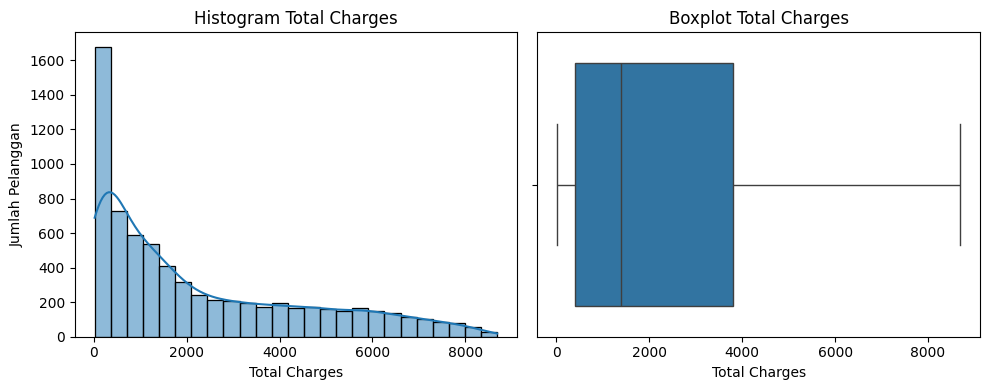

In [ ]:
plt.figure(figsize=(10,4))

# Histogram
plt.subplot(1,2,1)
sns.histplot(df_telco['Total Charges'], kde=True)
plt.title("Histogram Total Charges")
plt.xlabel("Total Charges")
plt.ylabel("Jumlah Pelanggan")

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(x=df_telco['Total Charges'])
plt.title("Boxplot Total Charges")

plt.tight_layout()
plt.show()


**💡 Insight:**
- Total Charges menunjukkan distribusi yang sangat right-skewed dengan mayoritas pelanggan memiliki total pembayaran rendah. Rentang nilai cukup luas hingga sekitar 8500, yang mencerminkan adanya pelanggan dengan masa berlangganan panjang dan pembayaran kumulatif tinggi. Tidak terdapat outlier ekstrem, dan pola ini wajar karena variabel bersifat akumulatif.

### 2.4 Distribusi Churn Label
> **Pertanyaan:** Bagaimana proporsi pelanggan yang churn dan tidak churn?

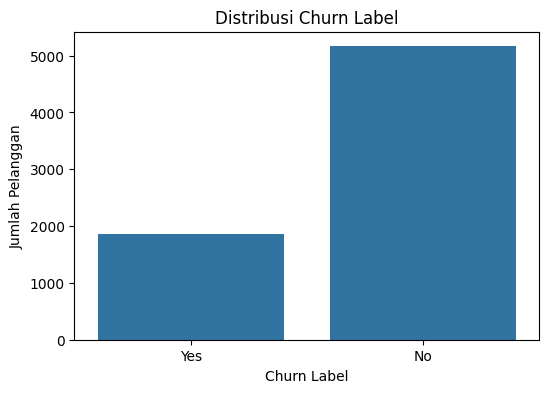

Persentase Churn:
Churn Label
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn Label', data=df_telco)
plt.title("Distribusi Churn Label")
plt.xlabel("Churn Label")
plt.ylabel("Jumlah Pelanggan")
plt.show()

# Persentase
print("Persentase Churn:")
print(df_telco['Churn Label'].value_counts(normalize=True) * 100)


**💡 Insight:**
- Distribusi Churn Label menunjukkan bahwa 73,42% pelanggan tidak churn, sedangkan 26,58% pelanggan mengalami churn. Meskipun mayoritas pelanggan bertahan, tingkat churn sebesar sekitar 26% tergolong cukup signifikan dan memerlukan perhatian lebih lanjut untuk strategi retensi pelanggan.

### 2.5 Distribusi Contract
> **Pertanyaan:** Bagaimana distribusi jenis kontrak pelanggan?

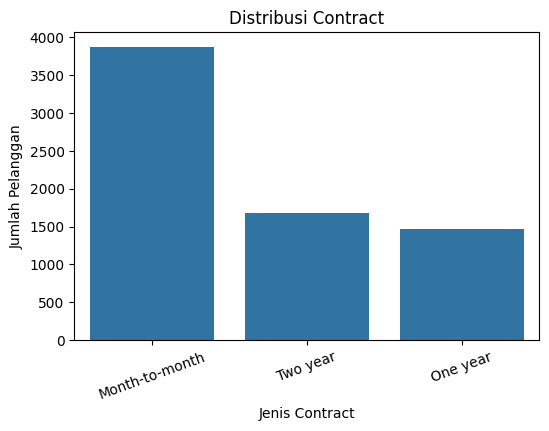

Persentase Contract:
Contract
Month-to-month    55.105233
Two year          23.961889
One year          20.932878
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', data=df_telco)
plt.title("Distribusi Contract")
plt.xlabel("Jenis Contract")
plt.ylabel("Jumlah Pelanggan")
plt.xticks(rotation=20)
plt.show()

# Persentase
print("Persentase Contract:")
print(df_telco['Contract'].value_counts(normalize=True) * 100)


**💡 Insight:**
- Distribusi Contract menunjukkan bahwa 55,11% pelanggan menggunakan kontrak Month-to-month, sedangkan kontrak One year dan Two year masing-masing sebesar 20,93% dan 23,96%. Hal ini menunjukkan bahwa mayoritas pelanggan tidak memiliki komitmen jangka panjang, yang berpotensi meningkatkan risiko churn

# Visualisasi Data Bivariat

### 3.1 Tenure & Total Charges
> **Pertanyaan:** Apakah semakin lama pelanggan berlangganan, semakin Total Charges

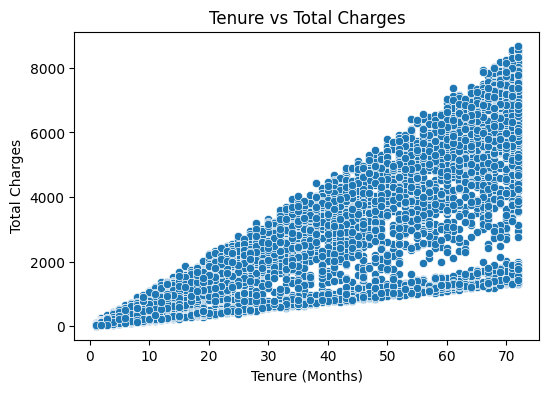

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Tenure Months', y='Total Charges', data=df_telco)
plt.title("Tenure vs Total Charges")
plt.xlabel("Tenure (Months)")
plt.ylabel("Total Charges")
plt.show()


**💡 Insight:**
- Scatter plot menunjukkan adanya hubungan positif yang kuat antara Tenure dan Total Charges. Semakin lama pelanggan berlangganan, semakin besar total biaya yang dibayarkan.

In [ ]:
df_telco[['Tenure Months', 'Total Charges']].corr()


,Tenure Months,Total Charges
Tenure Months,1.00000,0.82588
Total Charges,0.82588,1.00000


**💡 Insight:**
- Hasil korelasi menunjukkan nilai sebesar 0.82588 antara Tenure Months dan Total Charges, yang mengindikasikan adanya hubungan positif yang kuat. Hal ini menunjukkan bahwa semakin lama pelanggan berlangganan, semakin besar total biaya yang dibayarkan.

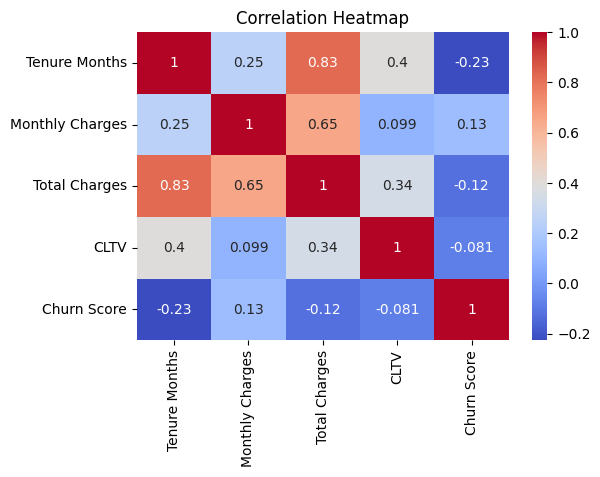

In [ ]:
# membuat hearmap untuk Semua variabel numerik
plt.figure(figsize=(6,4))

sns.heatmap(
    df_telco[['Tenure Months','Monthly Charges','Total Charges','CLTV','Churn Score']].corr(),
    annot=True,
    cmap='coolwarm'
)

plt.title("Correlation Heatmap")
plt.show()


# Visualisasi Data Kategorikal

### 4 Contract & Churn Label
> **Pertanyaan:** Mana yang paling kuat dan masuk akal?

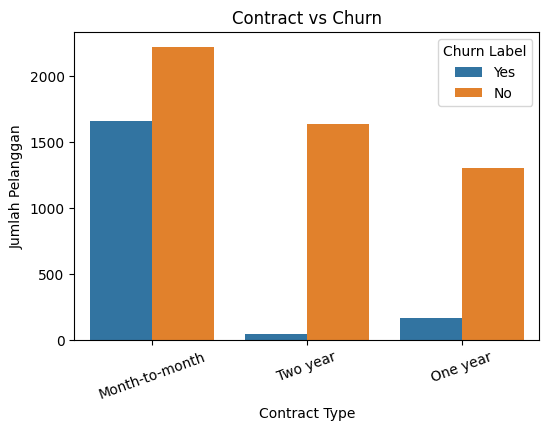

In [ ]:
plt.figure(figsize=(6,4))

sns.countplot(x='Contract', hue='Churn Label', data=df_telco)

plt.title("Contract vs Churn")
plt.xlabel("Contract Type")
plt.ylabel("Jumlah Pelanggan")
plt.xticks(rotation=20)
plt.show()


**💡 Insight:**
- Visualisasi menunjukkan bahwa pelanggan dengan kontrak Month-to-month memiliki tingkat churn yang jauh lebih tinggi dibandingkan pelanggan dengan kontrak One year dan Two year. Sebaliknya, pelanggan dengan kontrak Two year memiliki tingkat churn yang sangat rendah. Hal ini menunjukkan bahwa durasi kontrak memiliki hubungan yang signifikan terhadap risiko churn, di mana semakin panjang kontrak, semakin rendah kemungkinan pelanggan berhenti berlangganan.

# Data Story Telling
```
- Berdasarkan hasil analisis, mayoritas pelanggan memiliki kontrak Month-to-month (55%), yang menunjukkan banyak pelanggan tidak terikat komitmen jangka panjang. Tingkat churn secara keseluruhan mencapai sekitar 26%, yang tergolong cukup signifikan.

- Analisis lebih lanjut menunjukkan bahwa pelanggan dengan kontrak Month-to-month memiliki tingkat churn yang jauh lebih tinggi dibandingkan pelanggan dengan kontrak One year atau Two year. Hal ini menunjukkan bahwa durasi kontrak memiliki hubungan yang kuat terhadap risiko churn.

- Dari sisi numerik, Tenure memiliki korelasi positif yang kuat dengan Total Charges (0.83), yang menunjukkan bahwa semakin lama pelanggan berlangganan, semakin besar total pembayaran yang dilakukan. Namun, korelasi antara variabel numerik dan Churn Score relatif lemah, yang mengindikasikan bahwa faktor churn lebih dipengaruhi oleh variabel kategorikal seperti jenis kontrak.

- Secara keseluruhan, hasil analisis menunjukkan bahwa strategi retensi sebaiknya difokuskan pada pelanggan dengan kontrak Month-to-month, karena kelompok ini memiliki risiko churn paling tinggi.